### Implement Linear Regression Algorithm to predict profits for a food truck company. 

Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.

<img src="./images/food-truck-company.jpg" alt="Image for illustration purpose only" width="200" />

The 'data_profits_population.txt' contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#### Data Visualisation

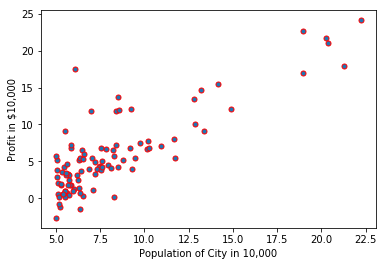

In [360]:
with open('data/data_profits_population.txt', 'r') as f:
    data = f.readlines()
data = [list(map(float, i.split(','))) for i in data]
data = np.array(data)
X = data[:,0]; y = data[:,-1]
m = len(y)     # number of training examples
X = X.reshape(m,1); y = y.reshape(m,1)
fig, ax = plt.subplots()
ax.plot(X,y, 'ro', markersize=5, markerfacecolor='C0', label='Training Data')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000')
tmp = X

#### Cost and Gradient descent Implementation

In [361]:
X = np.append(np.ones((m,1)),tmp, axis=1)
theta = np.zeros((2,1))
iterations = 1500
alpha=0.01  # learning rate

def computeCost(X,y,theta):
    m = len(y)
    J = 0
    J=1./(2*m)*np.sum( (X.dot(theta) - y)**2 )
    return J

def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta = theta - alpha/m*(  np.transpose(np.transpose(X.dot(theta)-y).dot(X)) )
        J_history[iter] = computeCost(X,y,theta)
        if (iter%400 == 0):
            print('J is now: %f' % J_history[iter])
    return theta, J_history
theta, _ = gradientDescent(X,y,theta, alpha, iterations)

J is now: 6.737190
J is now: 4.815501
J is now: 4.556908
J is now: 4.495847


#### Plot the linear fit

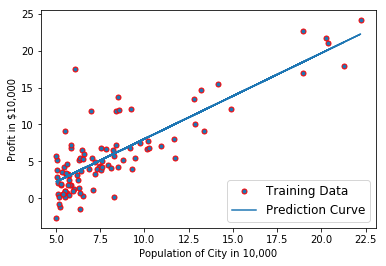

In [362]:
#### Plot the linear fit
ax.plot(X[:,1], X.dot(theta), '-', label='Prediction Curve')
legend = ax.legend(loc='lower right', shadow=False, fontsize='large')
# Put a nicer background color on the legend.
fig

#### Prediction of profits 

Prediction of profits given a population size of a city 35,000 and 70,000

In [363]:
predict1 = np.array([1,3.5]).dot(theta)[0]*10000
print('For population = 35,000 people, we predict a profit of %.1f $' % predict1)
predict2 = np.array([1,7]).dot(theta)[0]*10000
print('For population = 70,000 people, we predict a profit of %.1f $' % predict2)

For population = 35,000 people, we predict a profit of 4519.8 $
For population = 70,000 people, we predict a profit of 45342.5 $


### APPENDIX

#### Visualization of Cost J

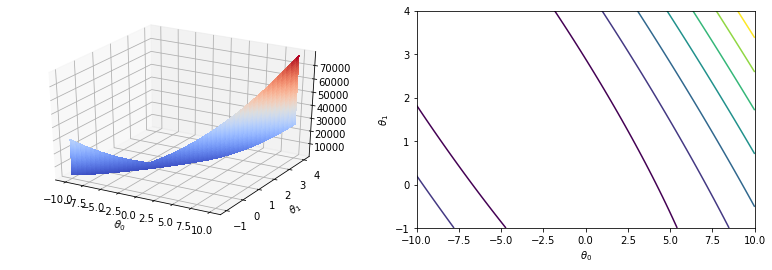

In [368]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i],theta1_vals[j]]
        J_vals[i,j] = computeCost(X,y,t)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
#ax.view_init(elev=51,azim=20)
surf = ax.plot_surface(theta0_vals,theta1_vals, J_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax = fig.add_subplot(1, 2, 2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
ax.contour(theta0_vals,theta1_vals, J_vals)
plt.show()       
